# MOUNT DRIVE TO ACCESS DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

In [3]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'/content/drive/MyDrive/Alzheimer_Dataset/Very_Mild_Demented/*')
mild = glob(r'/content/drive/MyDrive/Alzheimer_Dataset/Mild_Demented/*')
moderate = glob(r'/content/drive/MyDrive/Alzheimer_Dataset/Moderate_Demented/*')

#Dataset without Alzheimer
non = glob(r'/content/drive/MyDrive/Alzheimer_Dataset/Non_Demented/*')

/content/drive/MyDrive/Alzheimer_Dataset/Non_Demented/non_2865.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
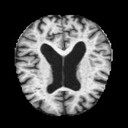

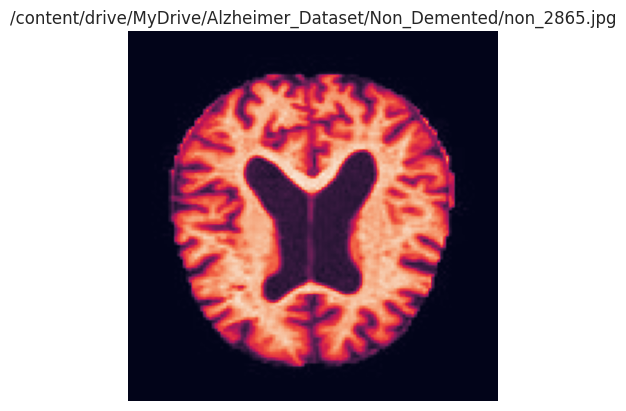

In [4]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
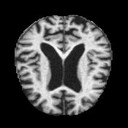

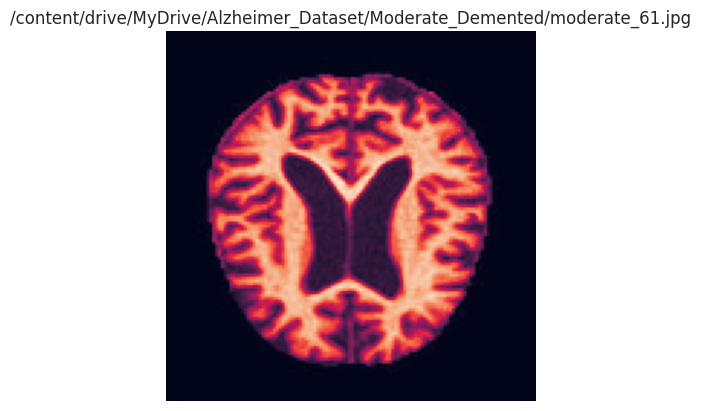

In [5]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

In [6]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)

In [7]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

3672
3330
7002
[0 0 0 ... 0 0 0]


# 1. Random Forest

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_x, train_y)
rf_y_pred = rf.predict(train_x)
rf_y_true = train_y

# Assess performance on Training data
print('Accuracy:', metrics.accuracy_score(rf_y_true, rf_y_pred))
print('Precision:', metrics.precision_score(rf_y_true, rf_y_pred))
print('Recall:', metrics.recall_score(rf_y_true, rf_y_pred))
print('F1:', metrics.f1_score(rf_y_true, rf_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(rf_y_true, rf_y_pred))

rf_y_pred = rf.predict(test_x)
rf_y_true = test_y

# Assess performance on Testing data
print('Accuracy:', metrics.accuracy_score(rf_y_true, rf_y_pred))
print('Precision:', metrics.precision_score(rf_y_true, rf_y_pred))
print('Recall:', metrics.recall_score(rf_y_true, rf_y_pred))
print('F1:', metrics.f1_score(rf_y_true, rf_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(rf_y_true, rf_y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion matrix: [[2963    0]
 [   0 2638]]
Accuracy: 0.9643112062812277
Precision: 0.9652173913043478
Recall: 0.9624277456647399
F1: 0.963820549927641
Confusion matrix: [[685  24]
 [ 26 666]]


# 2. SVM

In [9]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2963    0]
 [   0 2638]]
Accuracy :  0.9864382583868665
Precision :  0.9827833572453372
Recall :  0.9898843930635838
f1 :  0.986321094312455
Confusion matrix : [[697  12]
 [  7 685]]


# 3. Decision Trees

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x, train_y)
dt_y_pred = rf.predict(train_x)
dt_y_true = train_y

# Assess performance on Training data
print('Accuracy:', metrics.accuracy_score(dt_y_true, dt_y_pred))
print('Precision:', metrics.precision_score(dt_y_true, dt_y_pred))
print('Recall:', metrics.recall_score(dt_y_true, dt_y_pred))
print('F1:', metrics.f1_score(dt_y_true, dt_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(dt_y_true, dt_y_pred))

dt_y_pred = dt.predict(test_x)
dt_y_true = test_y

# Assess performance on Testing data
print('Accuracy:', metrics.accuracy_score(dt_y_true, dt_y_pred))
print('Precision:', metrics.precision_score(dt_y_true, dt_y_pred))
print('Recall:', metrics.recall_score(dt_y_true, dt_y_pred))
print('F1:', metrics.f1_score(dt_y_true, dt_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(dt_y_true, dt_y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion matrix: [[2963    0]
 [   0 2638]]
Accuracy: 0.8051391862955032
Precision: 0.8208269525267994
Recall: 0.7745664739884393
F1: 0.7970260223048325
Confusion matrix: [[592 117]
 [156 536]]


# 4. Logistic Regression

In [12]:
lr = LogisticRegression(max_iter=6000, random_state=42)
lr.fit(train_x, train_y)
lr_y_pred = lr.predict(train_x)
lr_y_true = train_y

# Assess performance on Training data
print('Accuracy:', metrics.accuracy_score(lr_y_true, lr_y_pred))
print('Precision:', metrics.precision_score(lr_y_true, lr_y_pred))
print('Recall:', metrics.recall_score(lr_y_true, lr_y_pred))
print('F1:', metrics.f1_score(lr_y_true, lr_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(lr_y_true, lr_y_pred))

lr_y_pred = lr.predict(test_x)
lr_y_true = test_y

# Assess performance on Testing data
print('Accuracy:', metrics.accuracy_score(lr_y_true, lr_y_pred))
print('Precision:', metrics.precision_score(lr_y_true, lr_y_pred))
print('Recall:', metrics.recall_score(lr_y_true, lr_y_pred))
print('F1:', metrics.f1_score(lr_y_true, lr_y_pred))
print('Confusion matrix:', metrics.confusion_matrix(lr_y_true, lr_y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion matrix: [[2963    0]
 [   0 2638]]
Accuracy: 0.9850107066381156
Precision: 0.9813486370157819
Recall: 0.9884393063583815
F1: 0.9848812095032398
Confusion matrix: [[696  13]
 [  8 684]]
